In [203]:
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import surprise as sp
import time
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [204]:
#Importing the CSVs to Dataframe format
UsersDF = pd.read_csv('../raw_data/users_cleaned.csv')
AnimesDF = pd.read_csv('../raw_data/anime_cleaned.csv')
ScoresDF = pd.read_csv('../raw_data/animelists_cleaned.csv')

In [205]:
studio_counts = AnimesDF['studio'].value_counts()
print(studio_counts[:30].sum())

3728


In [206]:
# Preprocessing
AnimesDF = AnimesDF.dropna(subset=['genre'])
AnimesDF['producer'] = AnimesDF['producer'].str.split(', ')
AnimesDF['genre'] = AnimesDF['genre'].str.split(', ')

Adding Studio significantly reduce the performance

In [207]:
# One-hot encoding of the 'studio' column ()
#studio_dummies = pd.get_dummies(AnimesDF['studio'], prefix='studio')

# Concatenating the original dataframe with the new `studio_dummies` dataframe
#AnimesDF = pd.concat([AnimesDF, studio_dummies], axis=1)

# MultiLabelBinarizer for 'genre' column
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(AnimesDF['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=AnimesDF.index)
AnimesDF = pd.concat([AnimesDF, genre_df], axis=1)

# Select and scale features
#studio_columns = [col for col in AnimesDF.columns if 'studio_' in col]
selected_columns = ['score', 'episodes', 'members', 'duration_min'] + list(mlb.classes_) #+ studio_columns
anime_df_selected = AnimesDF[selected_columns].dropna()

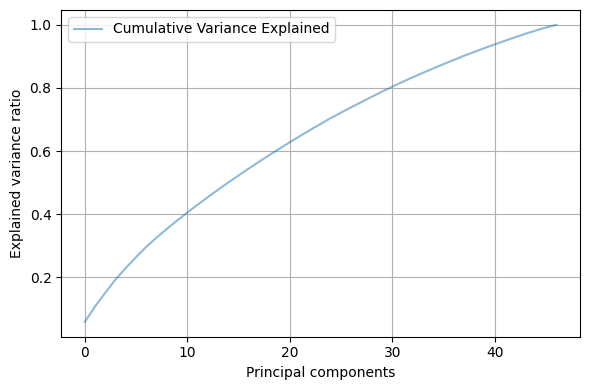

In [208]:
# Apply PCA
pca = PCA().set_output(transform = "pandas")
features_pca = pca.fit_transform(anime_df_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(len(explained_variance)), np.cumsum(explained_variance), alpha=0.5, label='Cumulative Variance Explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

In [209]:
# SCALING AND PRESERVING COLUMNS'NAMES
scaler = StandardScaler().set_output(transform = "pandas")
anime_df_scaled = scaler.fit_transform(anime_df_selected)
display(anime_df_scaled)

# PCA'ING AND PRESERVING COLUMNS'NAMES
threhsold_pca = 25
pca = PCA(n_components=threhsold_pca, whiten=True).set_output(transform="pandas") # find all the Principal Components PC (no y!)
pca.fit(anime_df_scaled)
features_pca = pca.transform(anime_df_scaled)

,score,episodes,members,duration_min,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0.841724,-0.055832,2.248116,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,2.597852,-0.109531,-0.123429,-0.064957,-0.038767
1,1.122227,0.286342,1.488368,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
2,0.755415,0.897367,0.215043,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
3,1.467462,0.579634,0.435561,-0.491233,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
4,1.963737,0.261901,1.286369,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,2.880767,-0.349124,-0.448555,0.060763,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
6664,-7.389971,-0.324683,-0.448298,-1.122085,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,2.487726,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
6665,-2.858763,-0.324683,-0.451599,0.257905,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
6666,-2.459585,-0.349124,-0.451484,-1.043229,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767


In [210]:
# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=24, random_state=0, n_init = 'auto')
clusters = kmeans.fit_predict(features_pca)

# Add clusters to the DataFrame
AnimesDF['cluster'] = clusters

# Check the number of animes in each cluster
print(AnimesDF['cluster'].value_counts())

# Check the mean values of the features in each cluster
print(AnimesDF.groupby('cluster')[['episodes', 'score', 'members', 'duration_min']].mean())

2     1289
1      779
5      607
9      490
14     352
19     337
22     330
10     298
16     298
6      297
20     264
3      237
21     182
23     177
13     160
0      143
15      94
17      74
11      64
8       54
12      53
18      47
7       28
4       10
Name: cluster, dtype: int64
          episodes     score        members  duration_min
cluster                                                  
0        10.440559  7.166643   31569.447552     48.002797
1        13.417202  7.095443   80233.913992     34.080873
2        12.885182  6.433320   24487.031032     16.304939
3        14.628692  6.732743   44618.527426     17.910689
4         2.000000  6.320000   13998.700000     20.100000
5        10.665568  7.209572   68639.924217     43.310544
6         2.080808  6.607475    5398.841751     26.835017
7         1.678571  6.482857   20838.250000     33.928571
8         7.555556  7.020370   34297.407407     23.826852
9        15.236735  7.015000   32380.030612     39.451020
10        8.

In [213]:
kmeans = KMeans(n_clusters=24, random_state=0, n_init = 'auto')
clusters = kmeans.fit_predict(features_pca)

silhouette = silhouette_score(features_pca, clusters)
calinski_harabasz = calinski_harabasz_score(features_pca, clusters)
davies_bouldin = davies_bouldin_score(features_pca, clusters)
    
new_row = pd.DataFrame({'k': k, 'Silhouette Score': silhouette, 'Calinski Harabasz Score': calinski_harabasz, 'Davies Bouldin Score': davies_bouldin}, index=[0])
results = pd.concat([results, new_row], ignore_index=True)
print(results)


     k  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0    2          0.371910               222.906692              2.071611
1    3          0.321152               244.494912              1.372064
2    4          0.133672               241.792779              2.077793
3    5          0.145548               258.502540              1.866564
4    6          0.153471               257.231334              1.778232
5    7          0.162071               252.943111              1.664929
6    8          0.108245               255.088705              2.225768
7    9          0.104684               271.999443              2.002114
8   10          0.119005               278.541560              1.898453
9   11          0.121665               280.195748              1.922866
10  12          0.123164               294.939512              1.800606
11  13          0.133396               302.928488              1.748530
12  14          0.145657               323.269060              1

In [211]:
# # Initialize an empty DataFrame to store the results
# results = pd.DataFrame(columns=['k', 'Silhouette Score', 'Calinski Harabasz Score', 'Davies Bouldin Score'])

# # Loop over the range of k values
# for k in range(2, 50):  # we start from 2 because silhouette_score is not defined for a single cluster
#     kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto')
#     clusters = kmeans.fit_predict(features_pca)

#     silhouette = silhouette_score(features_pca, clusters)
#     calinski_harabasz = calinski_harabasz_score(features_pca, clusters)
#     davies_bouldin = davies_bouldin_score(features_pca, clusters)
    
#     new_row = pd.DataFrame({'k': k, 'Silhouette Score': silhouette, 'Calinski Harabasz Score': calinski_harabasz, 'Davies Bouldin Score': davies_bouldin}, index=[0])
#     results = pd.concat([results, new_row], ignore_index=True)

# # Display the results
# print(results


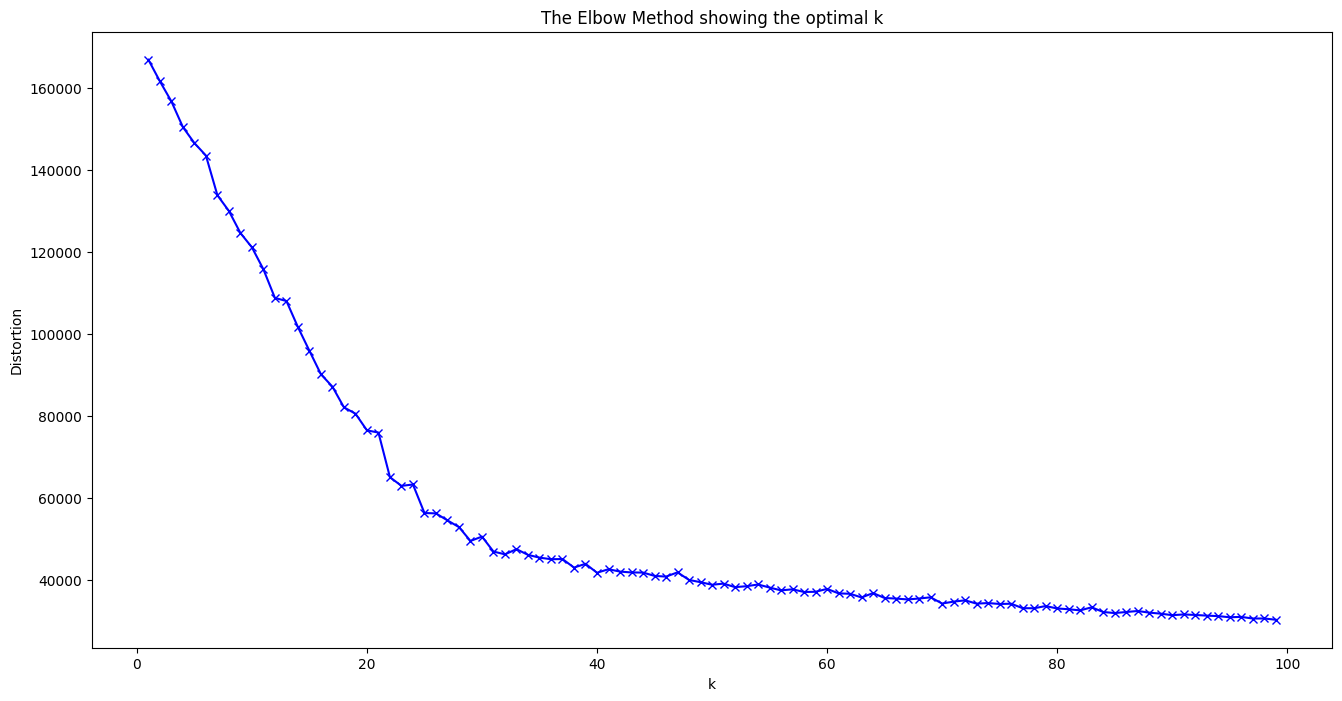

In [212]:
# Apply Elbow method
distortions = []
K = range(1,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(features_pca)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()